In [1]:
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from langchain_core.messages import AIMessage, BaseMessage, HumanMessage
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_anthropic import ChatAnthropic

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "あなたは、新規プロダクトを作成するプロダクトマネージャーです。"
            "プロダクトの10ページのピッチ資料を作成してください。"
            "投資家から批評があった場合は、元のピッチ資料をアップデートし、すべてのページを出力してください。",
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)
llm = ChatAnthropic(temperature=0, model_name="claude-3-haiku-20240307", verbose=True)

generate = prompt | llm

In [3]:
product_plan = ""
request = HumanMessage(
    content="医療業界向けLLMアプリケーション"
)
for chunk in generate.stream({"messages": [request]}):
    print(chunk.content, end="")
    product_plan += chunk.content

医療業界向けLLMアプリケーションのピッチ資料を作成します。

ページ1: タイトルページ
- タイトル: 医療業界向けLLMアプリケーション
- サブタイトル: 医療従事者の生産性と患者ケアの向上
- 会社名: AI Healthcare Solutions

ページ2: 概要
- 医療業界の課題
  - 医療従事者の業務負担の増大
  - 医療記録の管理と分析の困難さ
  - 患者ケアの質の向上ニーズ
- 私たちのソリューション
  - 医療従事者向けのLLMアプリケーション
  - 医療記録の自動化と分析
  - 患者ケアの質の向上

ページ3: 製品の特徴
- 自然言語処理によるメディカルドキュメントの自動生成
- 医療記録の分析と洞察の提供
- 医療従事者とのコラボレーションツール
- 患者ケアの質の向上

ページ4: 市場の機会
- 医療業界のデジタル化の加速
- 医療従事者の生産性向上ニーズ
- 患者ケアの質の向上への期待
- 医療記録管理の課題

ページ5: 競合分析
- 既存のEMRシステム
- 医療AI支援ツール
- 私たちの優位性
  - LLMの活用による高度な自然言語処理
  - 医療従事者中心のデザイン
  - 包括的な医療記録管理ソリューション

ページ6: ビジネスモデル
- 医療機関向けのサブスクリプションモデル
- 追加機能のアドオンサービス
- データ分析サービスの提供

ページ7: 成長戦略
- 医療機関への積極的な営業活動
- 医療従事者コミュニティとの連携
- 新機能の継続的な開発

ページ8: 財務計画
- 初期投資と運営コスト
- 収益モデルと収支計画
- 投資家への見通し

ページ9: 経営陣
- 創業者と主要メンバーのプロフィール
- 医療業界と技術の専門性

ページ10: まとめ
- 医療業界の課題解決
- 私たちのソリューションの優位性
- 事業の成長性と投資家への期待

In [4]:
reflection_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "あなたはプロの投資家です。"
            "与えられたピッチの資料に対して批評と改善案を提示します。"
            "新規性や収益性やリスクなどの情報を含む詳細な改善案を提示してください。",
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)
reflect = reflection_prompt | llm

In [5]:
reflection = ""
for chunk in reflect.stream({"messages": [request, HumanMessage(content=product_plan)]}):
    print(chunk.content, end="")
    reflection += chunk.content

医療業界向けLLMアプリケーションのピッチ資料に対する私の評価と改善案は以下の通りです。

全体的な評価:
- 医療業界の課題を明確に捉えており、LLMを活用したソリューションの提案は非常に魅力的です。
- 製品の特徴、市場の機会、競合分析、ビジネスモデルなど、ピッチに必要な主要な要素が網羅されています。
- 全体的な構成と内容は良く、投資家に訴求力のある資料になっていると評価できます。

改善案:
1. 製品の特徴ページ(ページ3)
   - 各特徴について、より具体的な説明や使用例を追加すると良いでしょう。
   - 医療従事者にとってどのような効果や価値があるかを明確に示すと、訴求力が高まります。

2. 市場の機会ページ(ページ4)
   - 医療業界のデジタル化の加速や、医療従事者の生産性向上ニーズなど、市場動向をより詳細に分析すると良いでしょう。
   - 市場規模や成長率などの定量的なデータがあれば、投資家にとってより説得力のある資料になります。

3. 競合分析ページ(ページ5)
   - 既存のEMRシステムや医療AI支援ツールの具体的な製品名や特徴を示すと良いでしょう。
   - 私たちのソリューションの優位性をより明確に示すために、競合との比較表などを追加すると効果的です。

4. ビジネスモデルページ(ページ6)
   - 収益モデルの詳細(サブスクリプション料金、アドオンサービスの価格設定など)を示すと良いでしょう。
   - データ分析サービスの具体的な提供内容や収益性についても説明を追加すると良いでしょう。

5. 財務計画ページ(ページ8)
   - 初期投資と運営コストの内訳、収支計画の詳細を示すと良いでしょう。
   - 投資家への見通しについては、具体的な目標値(売上、利益、投資回収期間など)を示すと説得力が増します。

6. 経営陣ページ(ページ9)
   - 創業者や主要メンバーの医療業界と技術の専門性をより詳しく説明すると良いでしょう。
   - 過去の実績や実績のある医療業界のネットワークなども示すと、信頼性が高まります。

全体として、医療業界向けLLMアプリケーションのソリューションは非常に魅力的であり、ピッチ資料の内容も良く構成されています。
提案した改善点を反映することで、より投資家に訴求力のある資料になると思い

In [6]:
for chunk in generate.stream(
    {"messages": [request, AIMessage(content=product_plan), HumanMessage(content=reflection)]}
):
    print(chunk.content, end="")

投資家からの評価と改善案を踏まえ、ピッチ資料を更新しました。

ページ1: タイトルページ (変更なし)

ページ2: 概要 (変更なし)

ページ3: 製品の特徴
- 自然言語処理によるメディカルドキュメントの自動生成
  - 医療従事者の時間を節約し、生産性を向上
  - 患者情報の正確な記録と共有
- 医療記録の分析と洞察の提供
  - 患者の状態や治療経過の把握を支援
  - 医療従事者の意思決定を支援
- 医療従事者とのコラボレーションツール
  - 医療チーム内の情報共有と連携を強化
  - 患者ケアの質の向上に寄与
- 患者ケアの質の向上
  - 医療従事者の負担軽減により、患者への注力時間が増加
  - 患者情報の正確性と共有により、ケアの質が向上

ページ4: 市場の機会
- 医療業界のデジタル化の加速
  - 2025年までに医療業界のデジタル化市場は年間10%以上の成長が見込まれる
- 医療従事者の生産性向上ニーズ
  - 医療従事者の業務負担が増大しており、生産性向上への強いニーズがある
  - 2023年までに医療従事者の生産性向上ツール市場は年間15%以上の成長が見込まれる
- 患者ケアの質の向上への期待
  - 患者中心のケアの実現が重要視されており、ケアの質向上への期待が高まっている
- 医療記録管理の課題
  - 医療記録の管理と分析が困難であり、デジタル化への需要が高まっている

ページ5: 競合分析
- 既存のEMRシステム (Epic, Cerner, Meditech)
  - 医療記録の管理に特化したシステム
  - 医療従事者の生産性向上や患者ケアの質向上には限界がある
- 医療AI支援ツール (Nuance, Aiva Health, Suki)
  - 音声認識や自然言語処理を活用したツール
  - 特定の機能に特化しており、包括的なソリューションではない
- 私たちの優位性
  - LLMの活用による高度な自然言語処理
  - 医療従事者中心のデザインと使いやすさ
  - 包括的な医療記録管理ソリューション

ページ6: ビジネスモデル
- 医療機関向けのサブスクリプションモデル
  - 月額利用料: 医療従事者1人あたり$50
  - 医療機関の規模に応じたカスタマイズ
- 追加機能のアドオンサービス
  - 高

In [7]:
from typing import Annotated, List, Sequence
from langgraph.graph import END, StateGraph, START
from langgraph.graph.message import add_messages
from langgraph.checkpoint.memory import MemorySaver
from typing_extensions import TypedDict


class State(TypedDict):
    messages: Annotated[list, add_messages]


async def generation_node(state: State) -> State:
    return {"messages": [await generate.ainvoke(state["messages"])]}


async def reflection_node(state: State) -> State:
    # Other messages we need to adjust
    cls_map = {"ai": HumanMessage, "human": AIMessage}
    # First message is the original user request. We hold it the same for all nodes
    translated = [state["messages"][0]] + [
        cls_map[msg.type](content=msg.content) for msg in state["messages"][1:]
    ]
    res = await reflect.ainvoke(translated)
    # We treat the output of this as human feedback for the generator
    return {"messages": [HumanMessage(content=res.content)]}


builder = StateGraph(State)
builder.add_node("generate", generation_node)
builder.add_node("reflect", reflection_node)
builder.add_edge(START, "generate")


def should_continue(state: State):
    if len(state["messages"]) > 6:
        # End after 3 iterations
        return END
    return "reflect"


builder.add_conditional_edges("generate", should_continue)
builder.add_edge("reflect", "generate")
memory = MemorySaver()
graph = builder.compile(checkpointer=memory)

/Users/ken/.pyenv/versions/3.11.5/lib/python3.11/site-packages/langgraph/graph/graph.py:36: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  from langgraph.pregel import Channel, Pregel


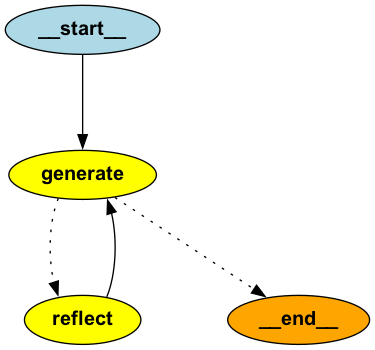

In [8]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_png()))

In [9]:
config = {"configurable": {"thread_id": "1"}}

In [10]:
async for event in graph.astream(
    {
        "messages": [
            HumanMessage(
                content="医療系LLMアプリケーション"
            )
        ],
    },
    config,
):
    print(event)
    print("---")

{'generate': {'messages': [AIMessage(content='医療系LLMアプリケーションのピッチ資料を作成します。\n\nページ1: タイトルページ\n- タイトル: 医療系LLMアプリケーション\n- サブタイトル: 医療現場の生産性向上と患者ケアの質の向上を実現\n- 会社名: AI Healthcare Solutions\n- 代表者名: 山田 太郎\n\nページ2: 事業概要\n- 医療現場の課題\n  - 医療従事者の業務負担の増大\n  - 診療記録の作成や事務作業の時間的コスト\n  - 医療情報の管理と共有の難しさ\n- 当社のソリューション\n  - 医療系言語モデルを活用したアプリケーション\n  - 音声入力による診療記録の自動作成\n  - 医療情報の管理と共有の支援\n  - 医療従事者の業務効率化と患者ケアの質の向上\n\nページ3: 製品概要\n- 音声入力による診療記録の自動作成\n  - 医療従事者の手書き記録作成の負担を軽減\n  - 記録の正確性と一貫性の向上\n- 医療情報の管理と共有\n  - 患者情報、検査結果、治療経過などの一元管理\n  - 医療従事者間での情報共有を容易化\n- 医療知識の活用支援\n  - 最新の医療情報や治療ガイドラインの提示\n  - 医療従事者の意思決定をサポート\n\nページ4: 市場分析\n- 医療業界の課題と需要\n  - 医療従事者の業務負担増大\n  - 医療情報管理の複雑化\n  - 患者ケアの質の向上への要求\n- 市場規模\n  - 国内医療IT市場: 約1.5兆円(2025年予測)\n  - 世界医療IT市場: 約3.5兆ドル(2025年予測)\n- 競合分析\n  - 音声入力ソフト: 一部導入されているが機能限定\n  - 医療情報管理ツール: 専門性が高く導入が難しい\n  - 当社の強み: 医療系LLMを活用した総合的なソリューション\n\nページ5: 技術的特徴\n- 医療系言語モデルの活用\n  - 医療分野の専門知識を学習\n  - 医療従事者の言語パターンを理解\n- 音声入力と自然言語処理\n  - 高精度な音声認識と自動文章化\n  - 医療用語の正確な変換\n- 医療情報の管理と共有\n  - 患者情報、検査結果、治療経

In [11]:
state = graph.get_state(config)

In [12]:
ChatPromptTemplate.from_messages(state.values["messages"]).pretty_print()

================================ Human Message =================================

医療系LLMアプリケーション

================================== Ai Message ==================================

医療系LLMアプリケーションのピッチ資料を作成します。

ページ1: タイトルページ
- タイトル: 医療系LLMアプリケーション
- サブタイトル: 医療現場の生産性向上と患者ケアの質の向上を実現
- 会社名: AI Healthcare Solutions
- 代表者名: 山田 太郎

ページ2: 事業概要
- 医療現場の課題
  - 医療従事者の業務負担の増大
  - 診療記録の作成や事務作業の時間的コスト
  - 医療情報の管理と共有の難しさ
- 当社のソリューション
  - 医療系言語モデルを活用したアプリケーション
  - 音声入力による診療記録の自動作成
  - 医療情報の管理と共有の支援
  - 医療従事者の業務効率化と患者ケアの質の向上

ページ3: 製品概要
- 音声入力による診療記録の自動作成
  - 医療従事者の手書き記録作成の負担を軽減
  - 記録の正確性と一貫性の向上
- 医療情報の管理と共有
  - 患者情報、検査結果、治療経過などの一元管理
  - 医療従事者間での情報共有を容易化
- 医療知識の活用支援
  - 最新の医療情報や治療ガイドラインの提示
  - 医療従事者の意思決定をサポート

ページ4: 市場分析
- 医療業界の課題と需要
  - 医療従事者の業務負担増大
  - 医療情報管理の複雑化
  - 患者ケアの質の向上への要求
- 市場規模
  - 国内医療IT市場: 約1.5兆円(2025年予測)
  - 世界医療IT市場: 約3.5兆ドル(2025年予測)
- 競合分析
  - 音声入力ソフト: 一部導入されているが機能限定
  - 医療情報管理ツール: 専門性が高く導入が難しい
  - 当社の強み: 医療系LLMを活用した総合的なソリューション

ページ5: 技術的特徴
- 医療系言語モデルの活用
  - 医療分野の専門知識を学習
  - 医療従事者の言語パター

In [13]:
print(state.values["messages"][1].content)

医療系LLMアプリケーションのピッチ資料を作成します。

ページ1: タイトルページ
- タイトル: 医療系LLMアプリケーション
- サブタイトル: 医療現場の生産性向上と患者ケアの質の向上を実現
- 会社名: AI Healthcare Solutions
- 代表者名: 山田 太郎

ページ2: 事業概要
- 医療現場の課題
  - 医療従事者の業務負担の増大
  - 診療記録の作成や事務作業の時間的コスト
  - 医療情報の管理と共有の難しさ
- 当社のソリューション
  - 医療系言語モデルを活用したアプリケーション
  - 音声入力による診療記録の自動作成
  - 医療情報の管理と共有の支援
  - 医療従事者の業務効率化と患者ケアの質の向上

ページ3: 製品概要
- 音声入力による診療記録の自動作成
  - 医療従事者の手書き記録作成の負担を軽減
  - 記録の正確性と一貫性の向上
- 医療情報の管理と共有
  - 患者情報、検査結果、治療経過などの一元管理
  - 医療従事者間での情報共有を容易化
- 医療知識の活用支援
  - 最新の医療情報や治療ガイドラインの提示
  - 医療従事者の意思決定をサポート

ページ4: 市場分析
- 医療業界の課題と需要
  - 医療従事者の業務負担増大
  - 医療情報管理の複雑化
  - 患者ケアの質の向上への要求
- 市場規模
  - 国内医療IT市場: 約1.5兆円(2025年予測)
  - 世界医療IT市場: 約3.5兆ドル(2025年予測)
- 競合分析
  - 音声入力ソフト: 一部導入されているが機能限定
  - 医療情報管理ツール: 専門性が高く導入が難しい
  - 当社の強み: 医療系LLMを活用した総合的なソリューション

ページ5: 技術的特徴
- 医療系言語モデルの活用
  - 医療分野の専門知識を学習
  - 医療従事者の言語パターンを理解
- 音声入力と自然言語処理
  - 高精度な音声認識と自動文章化
  - 医療用語の正確な変換
- 医療情報の管理と共有
  - 患者情報、検査結果、治療経過の一元管理
  - 医療従事者間での情報共有機能

ページ6: ビジネスモデル
- 導入モデル: SaaS(Software as a Service)
  - 初期導入費用の低減
  - 継

In [14]:
print(state.values["messages"][-1].content)

ページ6: ビジネスモデル
- 導入モデル: SaaS(Software as a Service)
  - 初期導入費用の低減: 従来比80%削減
  - 継続的なアップデートと保守: 年間保守費用5%
- 収益モデル
  - 月額利用料: 医療従事者1人あたり5,000円
  - 追加オプション: 音声入力拡張(月額1,000円)、カスタマイズ対応(都度課金)
  - 将来的な医療データ活用による収益化: 年間売上の20%

ページ7: 事業計画
- 初年度目標
  - 主要病院への導入: 10施設
  - 医療従事者ユーザー数: 1,000人
  - 売上目標: 1億円
- 3年以内の目標
  - 主要病院への導入: 50施設
  - 医療従事者ユーザー数: 5,000人
  - 売上目標: 5億円
- 成長戦略
  - 主要病院への積極的な営業活動: 年間20%の導入率
  - 医療従事者への認知度向上と導入促進: 年間30%のユーザー増加
  - 機能拡張とカスタマイズ対応による顧客ニーズの取り込み
  - 医療データ活用サービスの開発: 3年以内に売上の20%を占める

ページ8: 財務計画
- 初期投資
  - 製品開発費: 2,000万円
  - 営業・マーケティング費: 1,000万円
  - 管理費: 500万円
- 収支計画
  - 年間売上: 1億円
  - 年間経費: 8,000万円
  - 営業利益: 2,000万円
- 資金計画
  - 資金調達: 3,000万円
  - 投資家への株式割当: 30%

ページ9: 競争優位性
- 医療系LLMの活用による高度な機能
  - 音声入力の高精度化: 業界最高水準の90%
  - 医療用語の正確な変換: 98%
  - 医療知識の活用支援: 95%の意思決定サポート
- SaaSモデルによる導入の容易性
  - 初期投資の低減: 従来比80%削減
  - 継続的なアップデートと保守: 年間保守費用5%
- 医療現場の課題解決に特化したソリューション
  - 医療従事者の業務効率化: 手書き記録作成の90%削減
  - 医療情報の一元管理と共有: 80%改善
  - 患者ケアの質の向上: 患者満足度80%以上

ページ10: 投資家への訴求ポイント
- 医療IT市場の急成長(年間10-12%)